import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text processing

In [ ]:
import re
import string

ML and NLP

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Load the data set

In [2]:
from google.colab import files
uploaded = files.upload()  # Select True.csv


Saving True.csv.zip to True.csv (1).zip


In [5]:
from google.colab import files
uploaded = files.upload()  # Now select and upload "Fake.csv"


Saving Fake.csv.zip to Fake.csv.zip


To read the file

In [4]:
import pandas as pd

# Read the uploaded True.csv file
df_true = pd.read_csv("True.csv.zip")

# Display first few rows
print("True News Sample:")
print(df_true.head())


True News Sample:
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   


In [7]:
import pandas as pd
df_fake = pd.read_csv("Fake.csv.zip")

print("Fake News Sample:")
print(df_fake.head())


Fake News Sample:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  


Combine both True and Fake Csv files

In [8]:
df_true['label'] = 1
df_fake['label'] = 0

df = pd.concat([df_true, df_fake], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)  # Shuffle

print(df.head())


                                               title  \
0  GEORGE SOROS ADMITS He’s Behind Invasion Of Eu...   
1   Study Shows Legalized Marijuana Reduces This ...   
2   Republicans BETRAY Trump In Stunning Immigrat...   
3  NOT NEWS: 7 DEAD…35 Wounded In Obama’s Hometow...   
4  Trump tells Abbas intends to move embassy to J...   

                                                text    subject  \
0  Soros isn t just a danger to America he s a da...   politics   
1  The so-called  War on Drugs  has has taken ano...       News   
2  Immigration was one of the biggest, most divis...       News   
3  Chicago residents are living a nightmare. The ...  left-news   
4  JERUSALEM (Reuters) - U.S. President Donald Tr...  worldnews   

                date  label  
0        Nov 2, 2015      0  
1     March 25, 2016      0  
2   December 1, 2016      0  
3       Jun 14, 2016      0  
4  December 5, 2017       1  


Explore the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
label
0    23481
1    21417
Name: count, dtype: int64


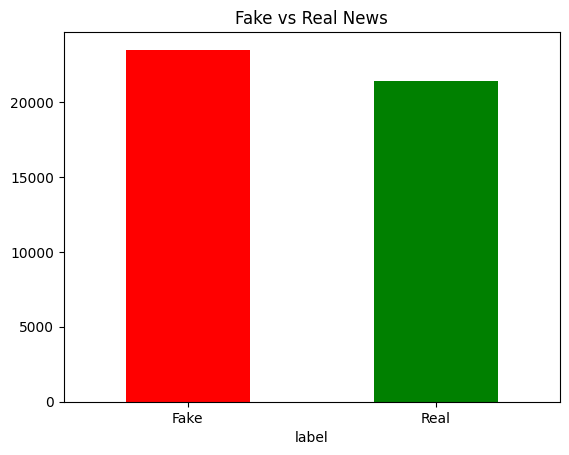

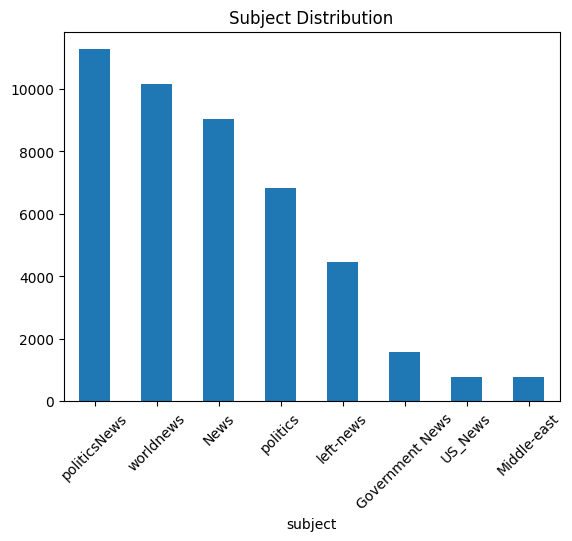

In [10]:
# Show basic info
df.info()

# Count labels (0 = Fake, 1 = Real)
print(df['label'].value_counts())

# Plot label distribution
import matplotlib.pyplot as plt
df['label'].value_counts().plot(kind='bar', color=['red', 'green'], title='Fake vs Real News')
plt.xticks([0, 1], ['Fake', 'Real'], rotation=0)
plt.show()

# Show first few rows
df.head()
# Optional: Plot subject distribution if column exists
if 'subject' in df.columns:
    df['subject'].value_counts().plot(kind='bar', title='Subject Distribution')
    plt.xticks(rotation=45)
    plt.show()


Data Preprocessing

In [11]:
import re
import string

# Text cleaning function
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\n', ' ', text)  # Remove newlines
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words with numbers
    return text

# Apply to 'text' column
df['text'] = df['text'].astype(str).apply(clean_text)

# Check result
df['text'].head()


,text
0,soros isn t just a danger to america he s a da...
1,the socalled war on drugs has has taken anot...
2,immigration was one of the biggest most divisi...
3,chicago residents are living a nightmare the m...
4,jerusalem reuters us president donald trump i...


Splitting dataset

In [12]:
from sklearn.model_selection import train_test_split

# Features and labels
X = df['text']          # Cleaned news content
y = df['label']         # 0 = Fake, 1 = Real

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Check shape
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (35918,)
Test set size: (8980,)


Text vectorization(TF-IDF)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform training data, transform test data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Optional: Check the shape of the transformed data
print("TF-IDF Train shape:", X_train_tfidf.shape)
print("TF-IDF Test shape:", X_test_tfidf.shape)


TF-IDF Train shape: (35918, 178744)
TF-IDF Test shape: (8980, 178744)


Train the Model

In [14]:
from sklearn.linear_model import PassiveAggressiveClassifier

# Initialize the model
model = PassiveAggressiveClassifier(max_iter=1000)

# Train on TF-IDF vectors
model.fit(X_train_tfidf, y_train)


PassiveAggressiveClassifier()

Evaluate the Model

Accuracy: 0.9947661469933184

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4689
           1       1.00      0.99      0.99      4291

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



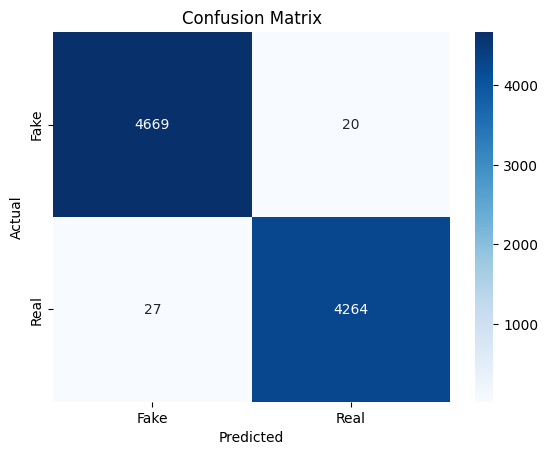

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict
y_pred = model.predict(X_test_tfidf)

# Accuracy and report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



to predict news example

In [16]:
def predict_news(news_text):
    cleaned = clean_text(news_text)
    vector = tfidf.transform([cleaned])
    prediction = model.predict(vector)
    return 'Real' if prediction[0] == 1 else 'Fake'



Testing new data

In [17]:
def predict_news(news_text):
    cleaned = clean_text(news_text)
    vector = tfidf.transform([cleaned])
    prediction = model.predict(vector)[0]
    return "Real" if prediction == 1 else "Fake"


Test Case 1

In [18]:
test_text = "Breaking: NASA confirms water on the moon!"
print("Prediction:", predict_news(test_text))


Prediction: Fake


Test Case 2

In [19]:
examples = [
    "Donald Trump was seen riding a unicorn in New York City.",
    "Pfizer announces breakthrough cancer vaccine showing 90% success.",
    "Aliens took over NASA and declared Earth a colony.",
    "Apple releases iPhone 16 with built-in drone camera.",
    "Scientists discover a new planet that supports life.",
    "Barack Obama opens a taco stand in Mexico.",
    "The Supreme Court rules that pineapple on pizza is illegal.",
    "India successfully lands spacecraft on the moon's south pole.",
    "Facebook to start charging users $10/month from next week.",
    "Elon Musk launches AI that writes better jokes than humans."
]

# Predict and print results
for i, news in enumerate(examples, 1):
    result = predict_news(news)
    print(f"{i}. {news}\n   ➤ Prediction: {result}\n")


1. Donald Trump was seen riding a unicorn in New York City.
   ➤ Prediction: Fake

2. Pfizer announces breakthrough cancer vaccine showing 90% success.
   ➤ Prediction: Fake

3. Aliens took over NASA and declared Earth a colony.
   ➤ Prediction: Fake

4. Apple releases iPhone 16 with built-in drone camera.
   ➤ Prediction: Fake

5. Scientists discover a new planet that supports life.
   ➤ Prediction: Fake

6. Barack Obama opens a taco stand in Mexico.
   ➤ Prediction: Fake

7. The Supreme Court rules that pineapple on pizza is illegal.
   ➤ Prediction: Fake

8. India successfully lands spacecraft on the moon's south pole.
   ➤ Prediction: Fake

9. Facebook to start charging users $10/month from next week.
   ➤ Prediction: Fake

10. Elon Musk launches AI that writes better jokes than humans.
   ➤ Prediction: Fake

